`Cat:` 0 and `Dog:` 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.regularizers import l2

# Train Model

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

!rm /content/dogs-vs-cats.zip
!rm -rf /content/dogs_vs_cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown


In [6]:
import os
path_to_dataset = input("Enter relative path to dataset: ")
print("Path to dataset: ", path_to_dataset)
test_path = os.path.join(path_to_dataset, 'test')
print("Path to test dataset: ", test_path)
train_path = os.path.join(path_to_dataset, 'train')
print("Path to train dataset: ", train_path)

Enter relative path to dataset: .
Path to dataset:  .
Path to test dataset:  ./test
Path to train dataset:  ./train


In [7]:
train_data = tf.keras.utils.image_dataset_from_directory(
    directory=train_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

val_data = tf.keras.utils.image_dataset_from_directory(
    directory=test_path,
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
def preprocess(image, label):
    image = tf.cast(image/255.0, tf.float32)
    return image, label

In [9]:
train_data = train_data.map(preprocess)
val_data = val_data.map(preprocess)

In [10]:
model = Sequential()

## Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=(256, 256, 3), name='2d_conv_l1'))
model.add(BatchNormalization(name='batch_normalization_l1'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='max_pooling_l1'))

model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', name='2d_conv_l2'))
model.add(BatchNormalization(name='batch_normalization_l2'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='max_pooling_l2'))

model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', name='2d_conv_l3'))
model.add(BatchNormalization(name='batch_normalization_l3'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid', name='max_pooling_l3'))

## Flatten Layer
model.add(Flatten(name='flatten'))

## Fully connected layers
model.add(Dense(units=128, activation='relu', kernel_regularizer=l2, name='fully_connected_layer_1'))
model.add(BatchNormalization(name='batch_normalization_l4'))
model.add(Dropout(0.1, name='Dropout_l1'))

model.add(Dense(units=64, activation='relu', kernel_regularizer=l2, name='fully_connected_layer_2'))
model.add(BatchNormalization(name='batch_normalization_l5'))
model.add(Dropout(0.1, name='Dropout_l2'))

model.add(Dense(units=1, activation='sigmoid', kernel_regularizer=l2, name='fully_connected_layer_3'))

model.name = 'cat_dog_cls'

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "cat_dog_cls"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2d_conv_l1 (Conv2D)             │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l1          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l1 (MaxPooling2D)   │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2d_conv_l2 (Conv2D)             │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l2          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l2 (MaxPooling2D)   │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2d_conv_l3 (Conv2D)             │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l3          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l3 (MaxPooling2D)   │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_1 (Dense) │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l4          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_l1 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_2 (Dense) │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l5          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_l2 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_3 (Dense) │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,961 (56.64 MB)

 Trainable params: 14,848,129 (56.64 MB)

 Non-trainable params: 832 (3.25 KB)

In [11]:
history = model.fit(train_data, epochs=10, validation_data=val_data).history
model.save('/content/drive/MyDrive/cat_dog_cls.keras')

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.6521 - loss: 3.1452 - val_accuracy: 0.6816 - val_loss: 1.5257
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 85ms/step - accuracy: 0.7173 - loss: 1.2560 - val_accuracy: 0.7430 - val_loss: 1.1259
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 84ms/step - accuracy: 0.7665 - loss: 1.1300 - val_accuracy: 0.7604 - val_loss: 1.3461
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7918 - loss: 1.2697 - val_accuracy: 0.7604 - val_loss: 1.4574
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8086 - loss: 1.5234 - val_accuracy: 0.7574 - val_loss: 1.7976
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 80ms/step - accuracy: 0.8242 - loss: 1.6626 - val_accuracy: 0.7888 - val_loss: 1.6468
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - accuracy: 0.8443 - loss: 1.6412 - val_accuracy: 0.7810 - val_loss: 1.8651
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.8582 - loss: 1.7181 - 

In [13]:
history = model.fit(train_data, epochs=50, validation_data=val_data, initial_epoch=10).history
model.save('/content/drive/MyDrive/cat_dog_cls.keras')

Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8917 - loss: 1.3640 - val_accuracy: 0.8382 - val_loss: 1.3297
Epoch 12/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.8946 - loss: 1.3085 - val_accuracy: 0.8212 - val_loss: 1.6968
Epoch 13/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.9134 - loss: 1.2861 - val_accuracy: 0.8536 - val_loss: 1.3828
Epoch 14/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.9089 - loss: 1.2269 - val_accuracy: 0.8724 - val_loss: 1.3582
Epoch 15/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 79ms/step - accuracy: 0.9199 - loss: 1.1971 - val_accuracy: 0.8438 - val_loss: 1.4456
Epoch 16/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 84ms/step - accuracy: 0.9287 - loss: 1.1116 - val_accuracy: 0.8518 - val_loss: 1.1756
Epoch 17/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 77ms/step - accuracy: 0.9288 - loss: 1.0219 - val_accuracy: 0.8598 - val_loss: 1.1201
Epoch 18/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.9291 - loss: 0

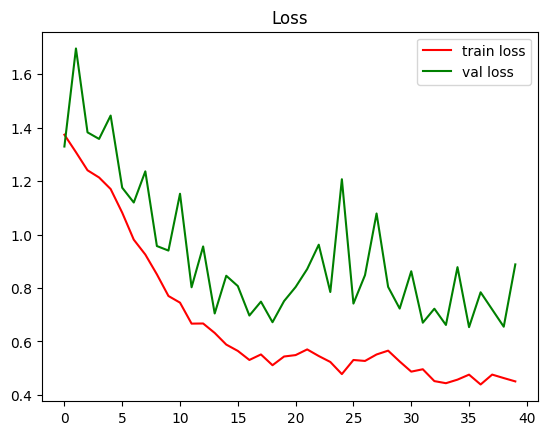

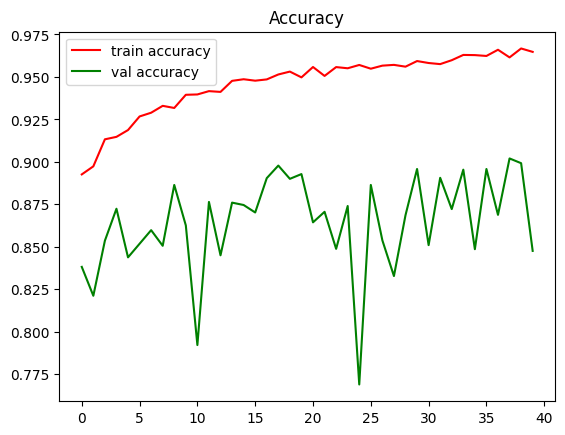

In [14]:
plt.plot(history['loss'], label='train loss', color='red')
plt.plot(history['val_loss'], label='val loss', color='green')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history['accuracy'], label='train accuracy', color='red')
plt.plot(history['val_accuracy'], label='val accuracy', color='green')
plt.title('Accuracy')
plt.legend()
plt.show()

# Load the trained model

In [3]:
trained_model = keras.models.load_model('cat_dog_cls.keras')
trained_model.summary()

Model: "cat_dog_cls"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 2d_conv_l1 (Conv2D)             │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l1          │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l1 (MaxPooling2D)   │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2d_conv_l2 (Conv2D)             │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l2          │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l2 (MaxPooling2D)   │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2d_conv_l3 (Conv2D)             │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l3          │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling_l3 (MaxPooling2D)   │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_1 (Dense) │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l4          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_l1 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_2 (Dense) │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_l5          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_l2 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fully_connected_layer_3 (Dense) │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,545,221 (169.93 MB)

 Trainable params: 14,848,129 (56.64 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 29,696,260 (113.28 MB)

## Test Model on Unseen Data